In [2]:
# Importing data manipulation libraries
import pandas as pd
import numpy as np

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing preprocessing libraries
from sklearn.preprocessing import StandardScaler

# Importing models from Sickit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Importing metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

# Importing additional tools
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [5]:
# Importing data manipulation libraries
import pandas as pd
import numpy as np

# ... (rest of your imports) ...

# Assuming your data is in a CSV file named 'your_data.csv'
df = pd.read_csv('/content/Medical_insurance (2).csv')  # Load data into a DataFrame named 'df'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
df.shape

(2772, 7)

In [7]:
# are there any duplicated rows?
df.duplicated().sum()

1435

In [8]:
#are there any null values?
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-9-5ae3feac7c28>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='children', data=df, palette=['green', 'black']) # Use df instead of df_new
<ipython-input-9-5ae3feac7c28>:7: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x='children', data=df, palette=['green', 'black']) # Use df instead of df_new


Text(0, 0.5, 'Count')

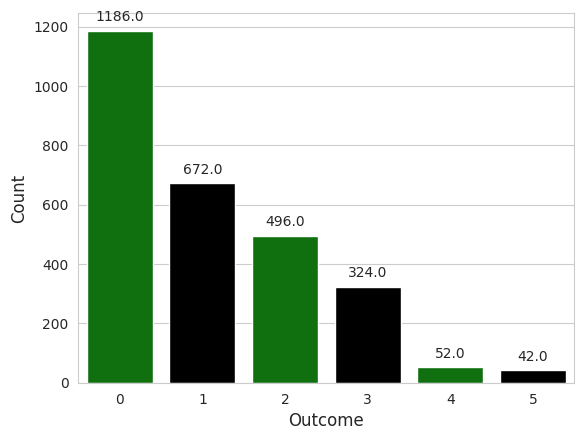

In [9]:
# create countplot
sns.set_style('whitegrid')

# Ensure df is defined and contains the 'Outcome' column
# df = pd.read_csv('your_data.csv') # Example: Read data from a CSV file - replace 'your_data.csv'

ax = sns.countplot(x='children', data=df, palette=['green', 'black']) # Use df instead of df_new
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

ax.set_xlabel('Outcome', fontsize=12)
ax.set_ylabel('Count',fontsize=12)

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# 1. Load the dataset (example: replace 'your_data.csv' with your actual file)
df = pd.read_csv('/content/Medical_insurance (2).csv')

# 2. Handle missing values
# Separate features (X) and target variable (y)
X = df.drop('smoker', axis=1)  # Drop the target column (assuming it's named 'Outcome')
y = df['children']  # Target column

# Check for missing values in the dataset
print(X.isnull().sum())

# Impute missing numerical values with mean
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='mean')
X[num_cols] = num_imputer.fit_transform(X[num_cols])

# Impute missing categorical values with the most frequent category
cat_cols = X.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# 3. Encoding categorical variables
# Label Encoding for the target variable (y) if it's categorical
if y.dtypes == 'object':
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

# One-Hot Encoding for categorical features
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), cat_cols)
], remainder='passthrough')

X = np.array(ct.fit_transform(X))  # Convert to NumPy array

# 4. Feature scaling (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 5. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Optional: Feature Selection using correlation or statistical methods (example: variance threshold)
# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold(threshold=0.1)
# X_train = selector.fit_transform(X_train)
# X_test = selector.transform(X_test)

# Now, X_train and y_train are ready for training a model
# X_test and y_test are used for model evaluation


age         0
sex         0
bmi         0
children    0
region      0
charges     0
dtype: int64


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn libraries for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression  # Use f_regression for regression tasks

# Optional: To visualize missing data
import missingno as msno

# Libraries for saving preprocessing objects
import joblib


In [14]:
# 1. Load the Dataset
# Replace the file path with your actual file path
df = pd.read_csv('/content/Medical_insurance (2).csv')

# Display the first few rows to verify loading
print("Dataset Loaded Successfully. First 5 rows:")
print(df.head())


Dataset Loaded Successfully. First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [16]:
# 3. Handle Missing Values and Define Features and Target
# Define the target variable
target_variable = 'children'  # Replace 'target_column_name' with the actual column name in your dataset

# Separate features and target
if target_variable not in df.columns:
    raise ValueError(f"The dataset must contain a '{target_variable}' column as the target variable.")

X = df.drop(target_variable, axis=1)
y = df[target_variable]

print("\nFeatures and Target Defined:")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features and Target Defined:
Features shape: (2772, 6)
Target shape: (2772,)


In [17]:
# 4. Identify Numerical and Categorical Columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")



Numerical Columns (3): ['age', 'bmi', 'charges']
Categorical Columns (3): ['sex', 'smoker', 'region']


In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn libraries for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression  # Use f_regression for regression tasks

# Optional: To visualize missing data
import missingno as msno

# Libraries for saving preprocessing objects
import joblib

# ... (Your existing code for loading and preparing the data) ...

# 4. Identify Numerical and Categorical Columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")

# 5. Create Preprocessing Pipeline (Define 'preprocessor')
# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # or 'median'
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')), # sparse=False for PCA
])

# Create a ColumnTransformer to apply the preprocessing to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

# 7. Feature Extraction and Selection
# Example: PCA for Dimensionality Reduction and SelectKBest for feature selection
feature_extraction_selection = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Now 'preprocessor' is defined
    ('pca', PCA(n_components=0.95)),  # Retain 95% of variance
    ('selectkbest', SelectKBest(score_func=f_regression, k=10))  # Select top 10 features for regression
])

print("\nFeature Extraction and Selection Pipeline Defined:")
print(feature_extraction_selection)


Numerical Columns (3): ['age', 'bmi', 'charges']
Categorical Columns (3): ['sex', 'smoker', 'region']

Feature Extraction and Selection Pipeline Defined:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'charges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                            

In [20]:
# 9. Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nDataset Split:")
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")



Dataset Split:
Training Features Shape: (2217, 6)
Testing Features Shape: (555, 6)
Training Target Shape: (2217,)
Testing Target Shape: (555,)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(



Explained variance ratio by PCA components:
[0.32623593 0.20372907 0.18995094 0.10780086 0.05432896 0.0526431
 0.05032458]


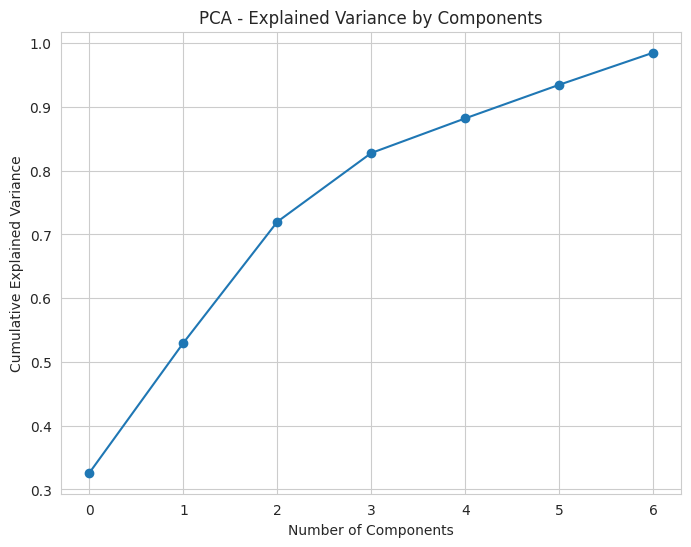

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn libraries for preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression  # Use f_regression for regression tasks

# Optional: To visualize missing data
import missingno as msno

# Libraries for saving preprocessing objects
import joblib

# ... (Your existing code for loading and preparing the data) ...


# Assuming you have defined X, y, numerical_cols, and categorical_cols previously

# 5. Create Preprocessing Pipeline (Define 'preprocessor')
# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # or 'median'
    ('scaler', StandardScaler()),
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')), # sparse=False for PCA
])

# Create a ColumnTransformer to apply the preprocessing to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

# 7. Feature Extraction and Selection
# Example: PCA for Dimensionality Reduction and SelectKBest for feature selection
feature_extraction_selection = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Now 'preprocessor' is defined
    ('pca', PCA(n_components=0.95)),  # Retain 95% of variance
    ('selectkbest', SelectKBest(score_func=f_regression, k=10))  # Select top 10 features for regression
])

# Assuming feature_extraction_selection is your complete pipeline
complete_pipeline = feature_extraction_selection  # Assign the pipeline to complete_pipeline

# Fit the pipeline to your training data
# This step is crucial to calculate explained_variance_ratio_
complete_pipeline.fit(X_train, y_train)  # Fit the pipeline before accessing PCA attributes

# 11. Visualize PCA Components (if PCA is used)
if 'pca' in complete_pipeline.named_steps:
    pca = complete_pipeline.named_steps['pca']
    print("\nExplained variance ratio by PCA components:")
    print(pca.explained_variance_ratio_)

    plt.figure(figsize=(8,6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('PCA - Explained Variance by Components')
    plt.grid(True)
    plt.show()

In [24]:
# 12. Save Preprocessing Objects (Optional)
# Save the preprocessor
joblib.dump(preprocessor, 'preprocessor.pkl')
print("\nPreprocessor saved as 'preprocessor.pkl'.")

# Save the complete pipeline
joblib.dump(complete_pipeline, 'complete_pipeline.pkl')
print("Complete pipeline saved as 'complete_pipeline.pkl'.")



Preprocessor saved as 'preprocessor.pkl'.
Complete pipeline saved as 'complete_pipeline.pkl'.


In [26]:
# 13. Example: Training a Machine Learning Model (e.g., Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
model = LinearRegression()

# Transform the training and testing data using the pipeline
X_train_complete = complete_pipeline.transform(X_train)  # Transform training data
X_test_complete = complete_pipeline.transform(X_test)    # Transform testing data

# Fit the model on the preprocessed training data
model.fit(X_train_complete, y_train)

# Predict on the test data
y_pred = model.predict(X_test_complete)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 1.5047
Mean Absolute Error (MAE): 0.9984
R-squared (R²): 0.0005


In [27]:
# 14. Additional Steps (Optional)
# - Hyperparameter Tuning using GridSearchCV or RandomizedSearchCV
# - Cross-Validation
# - Advanced Feature Engineering

# Example: Hyperparameter Tuning with Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge Regression
param_grid = {
    'alpha': [0.1, 1.0, 10.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky']
}

# Initialize Ridge Regression
ridge = Ridge(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
print("\nStarting GridSearchCV for Ridge Regression...")
grid_search.fit(X_train_complete, y_train)

# Best Parameters and Model
print("Best Parameters from GridSearchCV:", grid_search.best_params_)
best_ridge_model = grid_search.best_estimator_

# Predict with the best model
y_pred_best = best_ridge_model.predict(X_test_complete)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("\nBest Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_best:.4f}")
print(f"Mean Absolute Error (MAE): {mae_best:.4f}")
print(f"R-squared (R²): {r2_best:.4f}")



Starting GridSearchCV for Ridge Regression...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters from GridSearchCV: {'alpha': 100.0, 'solver': 'auto'}

Best Model Evaluation Metrics:
Mean Squared Error (MSE): 1.5041
Mean Absolute Error (MAE): 0.9980
R-squared (R²): 0.0009


Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l1'}
Best Cross-validation Accuracy: 92.71%
Accuracy on Test Set: 92.55%
Confusion Matrix:
[[610   4]
 [ 58 160]]


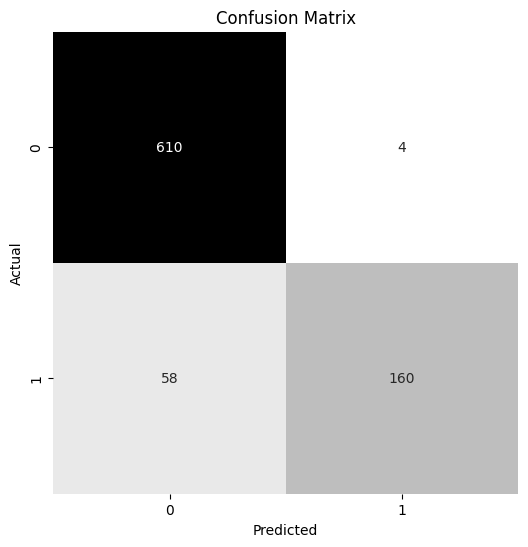

In [1]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Medical_insurance (2).csv')

# Define threshold for binary classification
threshold = 15000  # Example: Charges above $15000 are considered 'high'

# Create a binary target variable based on the threshold
data['charges_category'] = (data['charges'] > threshold).astype(int)

# Separate features (X) and target (y)
X = data.drop(['charges', 'charges_category'], axis=1)
y = data['charges_category']

# Handle categorical features using OneHotEncoder
categorical_features = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Define numerical features
numerical_features = ['age', 'bmi', 'children']

# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('logreg', LogisticRegression(solver='liblinear'))  # Use logistic regression
])

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__penalty': ['l1', 'l2']  # Penalty term (L1 or L2)
}

# Use cross-validation to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-validation Accuracy: {grid_search.best_score_ * 100:.2f}%')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model with the best found parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy on Test Set: {accuracy * 100:.2f}%')
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
# Change 'blacks' to 'binary' or other valid colormap name
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='binary', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.439e+07, tolerance: 3.305e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.402e+07, tolerance: 3.312e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.440e+07, tolerance: 3.305e

Best Parameters: {'lasso__alpha': 10}
Best Cross-validation Score (Negative MSE): -36898744.68
Mean Squared Error (MSE): 40022947.84
R² Score: 0.74
Classification Accuracy (Above/Below Threshold): 89.90%
Confusion Matrix:
[[582  32]
 [ 52 166]]


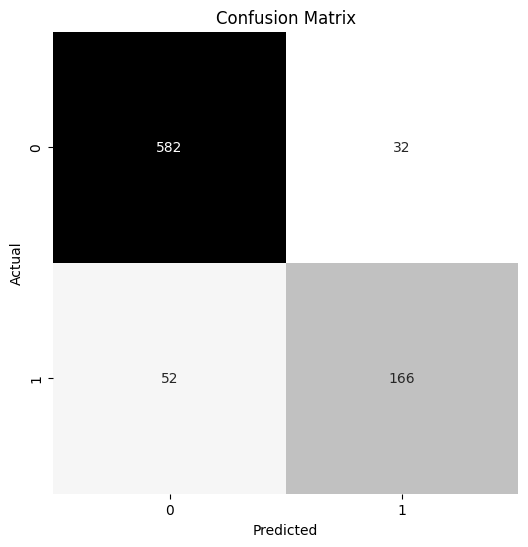

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Medical_insurance (2).csv')

# Define threshold for binary classification (for calculating accuracy)
threshold = 15000  # Example: Charges above $15000 are considered 'high'

# Separate features (X) and target (y)
X = data.drop(['charges'], axis=1)
y = data['charges']

# Handle categorical features using OneHotEncoder
categorical_features = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Define numerical features
numerical_features = ['age', 'bmi', 'children']

# Create a pipeline for preprocessing and Lasso model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize numerical features
    ('lasso', Lasso())  # Lasso (L1 regularization)
])

# Set up a grid search for hyperparameter tuning (regularization strength alpha)
param_grid = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # Alpha values to try (Lasso regularization parameter)
}

# Use cross-validation to find the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Print best parameters and best score (negative mean squared error)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-validation Score (Negative MSE): {grid_search.best_score_:.2f}')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model with the best-found parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set (continuous values)
y_pred_continuous = best_model.predict(X_test)

# Convert continuous predictions to binary classification (above or below threshold)
y_pred_class = (y_pred_continuous > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy and confusion matrix for binary classification
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_continuous)
r2 = r2_score(y_test, y_pred_continuous)

# Print regression results
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Print classification results
print(f'Classification Accuracy (Above/Below Threshold): {accuracy * 100:.2f}%')
print("Confusion Matrix:")
print(conf_matrix)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
# Change 'blacks' to 'binary' or other valid colormap name
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='binary', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-validation Score (Negative MSE): -12337383.37
Mean Squared Error (MSE): 9195321.64
R² Score: 0.94
Classification Accuracy (Above/Below Threshold): 95.67%
Confusion Matrix:
[[591  23]
 [ 13 205]]


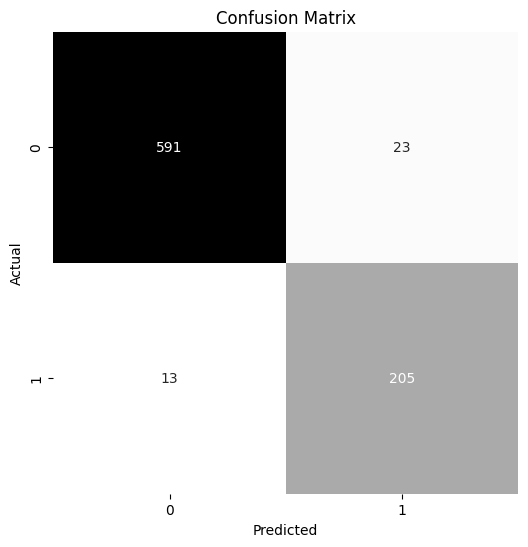

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import xgboost as xgb
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Medical_insurance (2).csv')

# Define threshold for binary classification (for calculating accuracy)
threshold = 15000  # Example: Charges above $15000 are considered 'high'

# Separate features (X) and target (y)
X = data.drop(['charges'], axis=1)
y = data['charges']

# Handle categorical features using OneHotEncoder
categorical_features = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Define numerical features
numerical_features = ['age', 'bmi', 'children']

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up an XGBoost regression model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],        # Step size shrinkage
    'max_depth': [3, 5, 7],                   # Maximum depth of trees
    'min_child_weight': [1, 3, 5],            # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.3],                   # Minimum loss reduction required to make a further partition
    'subsample': [0.8, 1],                    # Fraction of samples to be used for each tree
    'colsample_bytree': [0.8, 1]              # Fraction of features to be used by each tree
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-validation Score (Negative MSE): {grid_search.best_score_:.2f}')

# Fit the model with the best-found parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set (continuous values)
y_pred_continuous = best_model.predict(X_test)

# Convert continuous predictions to binary classification (above or below threshold)
y_pred_class = (y_pred_continuous > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy and confusion matrix for binary classification
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_continuous)
r2 = r2_score(y_test, y_pred_continuous)

# Print regression results
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Print classification results
print(f'Classification Accuracy (Above/Below Threshold): {accuracy * 100:.2f}%')
print("Confusion Matrix:")
print(conf_matrix)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
# Change 'blacks' to 'binary' or other valid colormap name
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='binary', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-validation Score (Negative MSE): -13304815.59
Mean Squared Error (MSE): 10292595.73
R² Score: 0.93
Classification Accuracy (Above/Below Threshold): 95.67%
Confusion Matrix:
[[594  20]
 [ 16 202]]


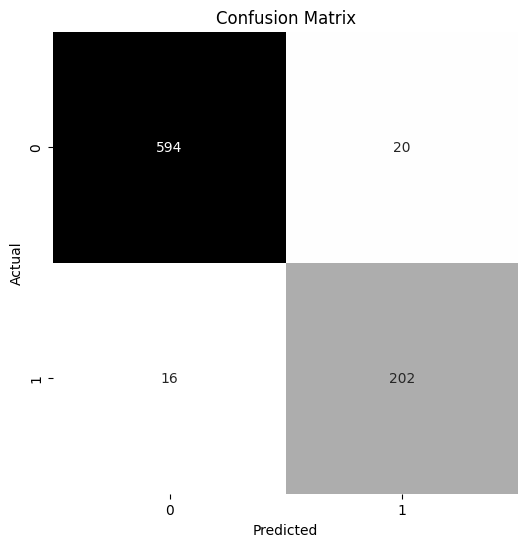

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Medical_insurance (2).csv')

# Define threshold for binary classification (for calculating accuracy)
threshold = 15000  # Example: Charges above $15000 are considered 'high'

# Separate features (X) and target (y)
X = data.drop(['charges'], axis=1)
y = data['charges']

# Handle categorical features using OneHotEncoder
categorical_features = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Define numerical features
numerical_features = ['age', 'bmi', 'children']

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Set up a Random Forest regression model
rf_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [5, 10, 15],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]              # Whether to bootstrap samples
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-validation Score (Negative MSE): {grid_search.best_score_:.2f}')

# Fit the model with the best-found parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set (continuous values)
y_pred_continuous = best_model.predict(X_test)

# Convert continuous predictions to binary classification (above or below threshold)
y_pred_class = (y_pred_continuous > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy and confusion matrix for binary classification
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred_continuous)
r2 = r2_score(y_test, y_pred_continuous)

# Print regression results
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Print classification results
print(f'Classification Accuracy (Above/Below Threshold): {accuracy * 100:.2f}%')
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
# Change 'blacks' to 'binary' or other valid colormap name
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='binary', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Best Alpha: 1
Mean Squared Error: 39938755.397154935
R-squared: 0.7397803862316481
Accuracy (Above/Below Threshold): 90.09%
Confusion Matrix:
[[397  18]
 [ 37 103]]


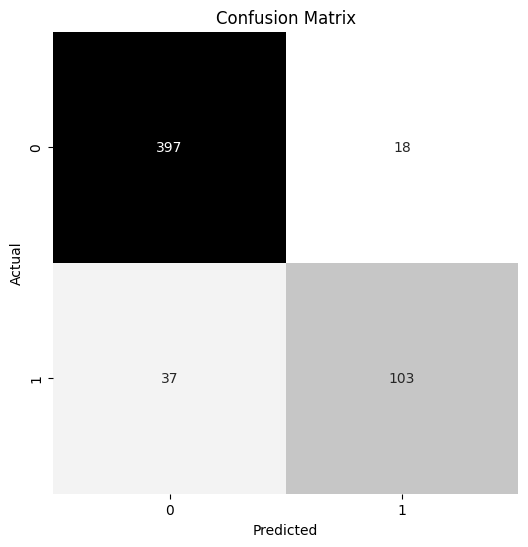

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Medical_insurance (2).csv')

# Define threshold for binary classification (for calculating accuracy)
threshold = 15000  # Example: Charges above $15000 are considered 'high'

# Separate features (X) and target (y)
X = data.drop(['charges'], axis=1)
y = data['charges']

# Handle categorical features using OneHotEncoder
categorical_features = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Define numerical features
numerical_features = ['age', 'bmi', 'children']

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Ridge Regression model with a range of alpha values for tuning
ridge_model = Ridge()

# Use GridSearchCV to find the best alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}  # Testing various alpha values
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_ridge_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# For accuracy (binary classification based on threshold)
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy (Above/Below Threshold): {accuracy * 100:.2f}%")

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
# Change 'blacks' to 'binary' or other valid colormap name
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='binary', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB
None
Accuracy: 0.9855769230769231
Confusion Matrix:
 [[662   6]
 [  6 158]]
Classification Repo

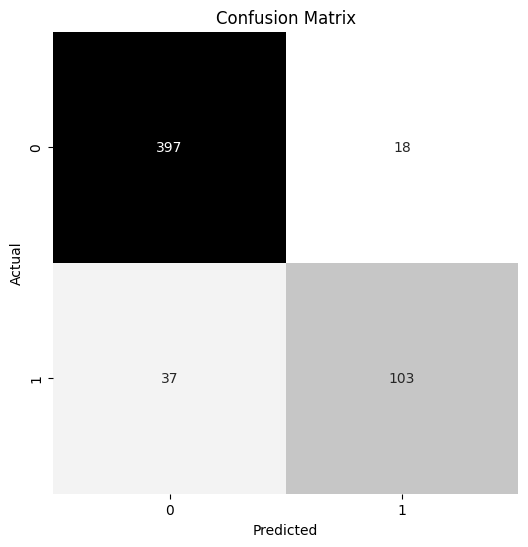

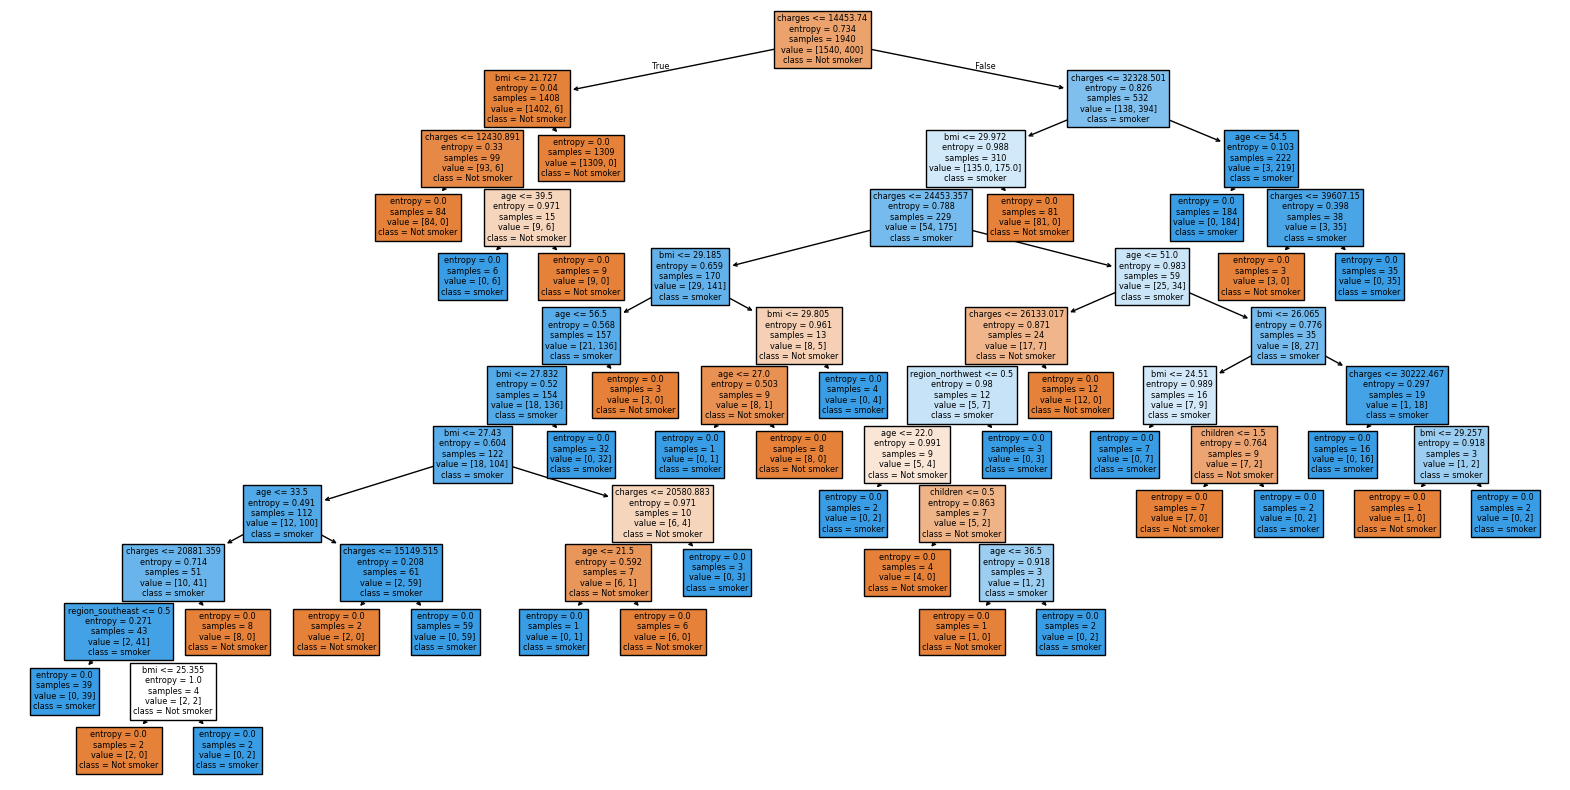

In [ ]:
# Step 1: Install required libraries
!pip install pandas scikit-learn matplotlib graphviz pydotplus

# Step 2: Import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus
from IPython.display import Image
from io import StringIO

# Step 3: Load the dataset
file_path = '/content/Medical_insurance (2).csv'  # Path to your dataset
df = pd.read_csv(file_path)

# Step 4: Preprocess the data
# Inspecting the dataset
print(df.head())
print(df.info())

# For this example, we'll assume that the dataset needs to be split into features and target.
# Assume 'smoker' is the target variable (binary classification problem).

# Encoding categorical variables if necessary
# Get a list of categorical columns (excluding the target 'smoker')
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'smoker']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # Only encode categorical features other than smoker

# Handling missing values (if any)
df = df.dropna()

# Splitting into features (X) and target (y)
X = df.drop('smoker', axis=1)  # Drop the target column (Churn_Yes after get_dummies)
y = df['smoker']  # Target column (Churn_Yes after get_dummies)


# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Train the J48/DecisionTreeClassifier model
clf = DecisionTreeClassifier(criterion='entropy')  # J48 uses entropy (information gain)
clf.fit(X_train, y_train)

# Step 7: Predict on test data
y_pred = clf.predict(X_test)

# Step 8: Analyze performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
# Change 'blacks' to 'binary' or other valid colormap name
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='binary', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not smoker', 'smoker'])
plt.show()

# Generate DOT data
dot_data = export_graphviz(clf, out_file=None,
                         feature_names=X.columns,
                         class_names=['Not smoker', 'smoker'],
                         filled=True, rounded=True,
                         special_characters=True)

# Create graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data) # Pass the dot_data string directly

# Display the graph (optional)
#Image(graph.create_png())

Accuracy: 92.79%
Confusion Matrix:
[[604  10]
 [ 50 168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       614
           1       0.94      0.77      0.85       218

    accuracy                           0.93       832
   macro avg       0.93      0.88      0.90       832
weighted avg       0.93      0.93      0.93       832



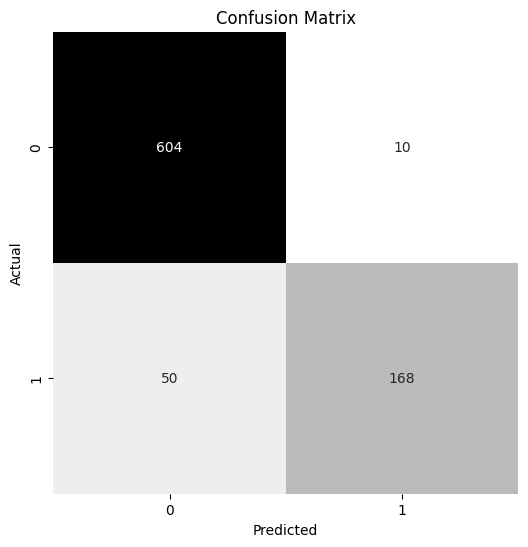

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/Medical_insurance (2).csv')

# Define threshold for binary classification (for calculating accuracy)
threshold = 15000  # Example: Charges above $15000 are considered 'high'

# Separate features (X) and target (y)
X = data.drop(['charges'], axis=1)
y = data['charges']

# Handle categorical features using OneHotEncoder
categorical_features = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Define numerical features
numerical_features = ['age', 'bmi', 'children']

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert target to binary classes based on threshold
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_classifier.fit(X_train, y_train_class)

# Make predictions on the test set
y_pred_class = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
classification_rep = classification_report(y_test_class, y_pred_class)


# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
# Change 'blacks' to 'binary' or other valid colormap name
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='binary', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Mean Squared Error (MSE): 18974989.00
R-squared (R2): 0.88
Accuracy (Above/Below Threshold): 91.59%
Confusion Matrix:
[[591  23]
 [ 47 171]]


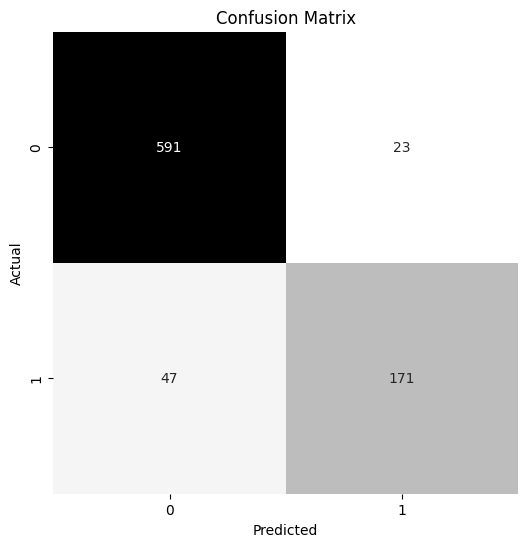

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('/content/Medical_insurance (2).csv')

# Separate features (X) and target (y)
X = data.drop(['charges'], axis=1)
y = data['charges']

# Handle categorical features using OneHotEncoder
categorical_features = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Define numerical features
numerical_features = ['age', 'bmi', 'children']

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid for tuning (optional)
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
# }

# # Use GridSearchCV for hyperparameter tuning (optional)
# # Uncomment the following lines if you want to perform hyperparameter tuning:
# grid_search = GridSearchCV(gb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_gb_regressor = grid_search.best_estimator_

# If you're not using GridSearchCV, fit the model here:
best_gb_regressor = gb_regressor
best_gb_regressor.fit(X_train, y_train) # This line fits the model to the training data

# Make predictions on the test set
y_pred = best_gb_regressor.predict(X_test)

# Define a threshold for binary classification
threshold = 15000  # Example threshold

# Convert continuous predictions to binary classes
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

# Evaluate the model (regression metrics)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
# print(f"Best Hyperparameters: {grid_search.best_params_}")  # If using GridSearchCV
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Print accuracy and confusion matrix for binary classification
print(f"Accuracy (Above/Below Threshold): {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
# Change 'blacks' to 'binary' or other valid colormap name
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='binary', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

Mean Squared Error (MSE): 18974989.00
R-squared (R2): 0.88
Accuracy (Above/Below Threshold): 91.59%
Confusion Matrix:
[[591  23]
 [ 47 171]]


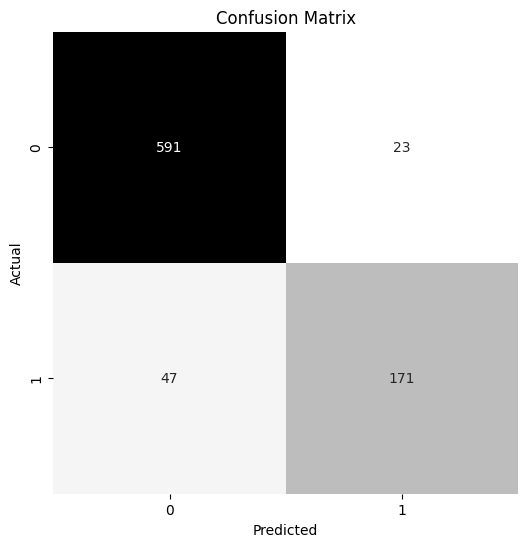

In [ ]:
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

# 1. Load Your Dataset
data = pd.read_csv('/content/Medical_insurance (2).csv')

# 2. Separate Features (X) and Target (y)
X = data.drop(['charges'], axis=1)
y = data['charges']

# 3. Handle Categorical Features
categorical_features = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(X[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# 4. Define Numerical Features
numerical_features = ['age', 'bmi', 'children']

# 5. Standardize Numerical Features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# 6. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7. Create and Train the Model
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train, y_train)

# 8. Make Predictions
y_pred = gb_regressor.predict(X_test)

# 9. Evaluate Regression Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# 10. Establish a Threshold for Binary Classification
threshold = 15000  # Example threshold (adjust as needed)

# 11. Convert Predictions to Binary Classes
y_pred_class = (y_pred > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# 12. Calculate Accuracy and Confusion Matrix
accuracy = accuracy_score(y_test_class, y_pred_class)
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

print(f"Accuracy (Above/Below Threshold): {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
# Change 'blacks' to 'binary' or other valid colormap name
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='binary', cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

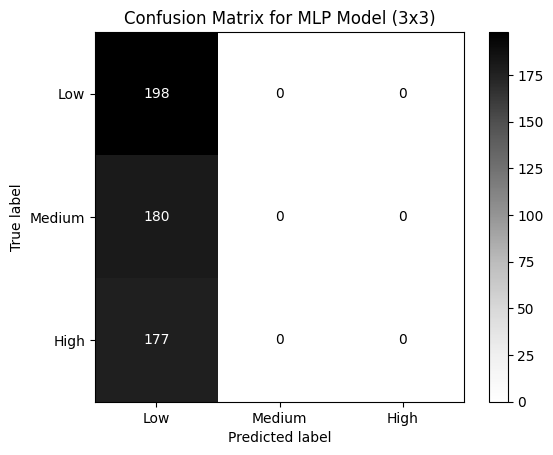

Confusion Matrix:
 [[198   0   0]
 [180   0   0]
 [177   0   0]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/content/Medical_insurance (2).csv")

# Preprocessing
# Creating a target variable with 3 categories based on charges
# Define charge thresholds for the categories (adjust as needed)
low_threshold = data['charges'].quantile(0.33)  # 33rd percentile
high_threshold = data['charges'].quantile(0.66)  # 66th percentile

data['target'] = pd.cut(data['charges'],
                        bins=[data['charges'].min(), low_threshold, high_threshold, data['charges'].max()],
                        labels=[0, 1, 2],  # 0: Low, 1: Medium, 2: High
                        include_lowest=True)

# Dropping unnecessary columns
# Replaced 'Patient Id' with 'bmi'
data.drop(['bmi', 'charges'], axis=1, inplace=True)

# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Splitting the dataset
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the MLP model
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Making predictions and categorizing into 3 classes
y_pred_continuous = mlp.predict(X_test)

# **Fix:** Ensure bins are monotonically increasing
bins = [y_pred_continuous.min(), low_threshold, high_threshold, y_pred_continuous.max()]
# Sort the bins to ensure they are monotonically increasing
bins.sort()

y_pred = pd.cut(y_pred_continuous,
                bins=bins,  # Use the sorted bins
                labels=[0, 1, 2],
                include_lowest=True,
                duplicates='drop') # added to handle potential duplicate edges

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Low', 'Medium', 'High'])  # Set labels for the 3 categories
disp.plot(cmap='Greys')
plt.title("Confusion Matrix for MLP Model (3x3)")
plt.show()

print("Confusion Matrix:\n", cm)